<a href="https://colab.research.google.com/github/LEAF-BoiseState/GEOS-212-Python-Intro/blob/main/GEOS212_SP2021_IntroToHydroPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nwis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nwis import Nwis

In [3]:
# Set site ID and start/end dates
site_id = '13185000' # Boise River at Twin Springs
# site_id = '13139510' # Big Wood River at Hailey
# site_id = '13246000' # North Fork of the Payette near Banks
# site_id = '13042500' # Henry's Fork Near Island Park
# site_id = '06721500' # North St. Vrain near Allen's Park (CO)
# site_id = '06752260' # Cache La Poudre River near Fort Collins (CO)
# site_id = '09085000' # Roaring Fork River at Glenwood Springs (CO)

my_start = '2015-10-01'
my_end = '2020-09-30'

In [4]:
# Get data from NWIS
nwis_data = Nwis()
dataset = nwis_data.get_data(site=site_id, start_date=my_start, end_date=my_end, data_type='dv')

In [5]:
# Show variable metadata
for var_name in dataset.data_vars:
  print(var_name)
  print(dataset[var_name].attrs)

00060
{'variable_name': 'discharge', 'variable_unit': 'cubic feet per second', 'variable_data_type': 'instantaneous value'}


In [6]:
dataset['00060']

<xarray.DataArray '00060' (datetime: 1827)>
array([301., 314., 313., ..., 377., 372., 364.])
Coordinates:
  * datetime  (datetime) datetime64[ns] 2015-10-01 2015-10-02 ... 2020-09-30
Attributes:
    variable_name:       discharge
    variable_unit:       cubic feet per second
    variable_data_type:  instantaneous value

In [7]:
Q = dataset['00060'].values
dates = dataset['datetime'].values

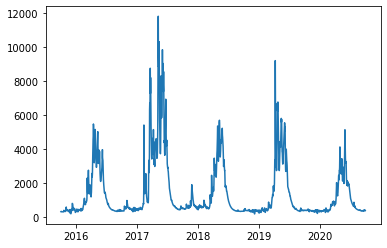

In [8]:
plt.plot(dates,Q)

Text(0, 0.5, 'Discharge [ft^3/s]')

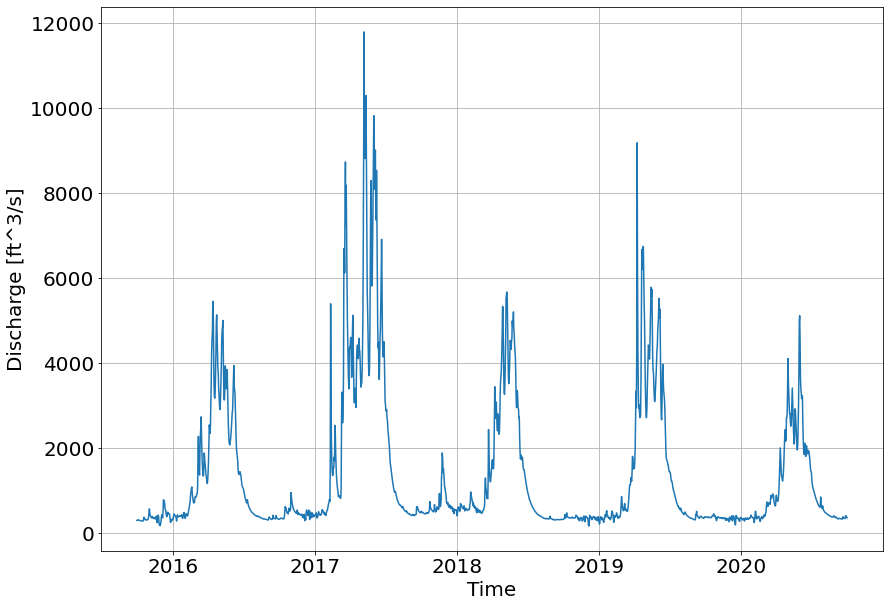

In [9]:
plt.figure(figsize=(14,10)) # Create an empty plot that is 14" wide x 10" tall
plt.rcParams.update({'font.size': 20}) # Increase the font size
plt.plot(dates,Q) # Plot discharge versus time
plt.grid() # Turn on the major axes grids for clarity
plt.xlabel('Time') # Label the x-axis
plt.ylabel('Discharge [ft^3/s]') # Label the y-axis

In [10]:
WY = dataset['datetime.year'].values
dates = pd.DatetimeIndex(dates)

WY[dates.month>=10] += 1
WY

array([2016, 2016, 2016, ..., 2020, 2020, 2020])

In [11]:
df = pd.DataFrame()
df['Dates'] = dates
df['WaterYear'] = WY
df['Discharge'] = Q

In [13]:
df

,Dates,WaterYear,Discharge
0,2015-10-01,2016,301.0
1,2015-10-02,2016,314.0
2,2015-10-03,2016,313.0
3,2015-10-04,2016,318.0
4,2015-10-05,2016,313.0
...,...,...,...
1822,2020-09-26,2020,407.0
1823,2020-09-27,2020,417.0
1824,2020-09-28,2020,377.0
1825,2020-09-29,2020,372.0


In [14]:
df.to_pickle('MyFirstPickle.pkl')